### <font color = blue> Steps into building a precise predictive model </font>

1. Understand the problem. <br> 
2. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.<br>
3. Univariable study.<br>
4. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
5. Multivariate study. <br>
6. We'll try to understand how the dependent variable and independent variables relate. <br>
7. Basic cleaning. <br>
8. We'll clean the dataset and handle the missing data, outliers and categorical variables.
9. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read data into a dataframe
df_train = pd.read_csv('../Kaggle-HousesPrice/input/train.csv')

In [3]:
# a sample of data
df_train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


###<font color = blue> Understand variables and our target predictive model </font> 
- Variables:
 - Number of variables: 80, including both numerical (continuous) and categorical (discrete) variables
 - Dependent/Target Variable: SalePrice
 - Independent Variables: 79 variables
- Target: build a regression model to predict the SalePrice
- 

In [4]:
# descriptive analysis of our target variable: SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<i> Quick glance: It can bee seen that we have 1460 samples. The sample size is relatively high.
The minimum of SalePrice was 180921, which is greater than 0, good news!'

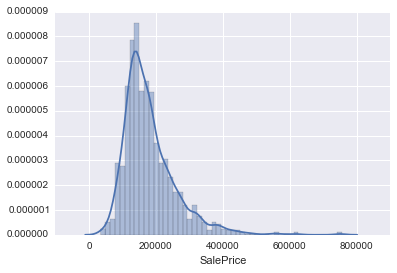

In [9]:
# Let's look into a distribution of the SalePrice through a Univariate Plotting (a histogram)
sns.distplot(df_train['SalePrice'], bins=50)
sns.plt.show()

<i> It's a right-skewed (positive skewness) distribution

In [16]:
# Print skewness and kurtosis
print ("Skewness: %.4f" %(df_train['SalePrice'].skew()))
print ("Kurtosis: %.4f" %(df_train['SalePrice'].kurt()))

Skewness: 1.8829
Kurtosis: 6.5363


<i><b> Kurtosis - Measure of the relative peakedness of a distribution. </b><br>
K = 3 indicates a normal “bellshaped” distribution (mesokurtic). <br>
K < 3 indicates a platykurtic distribution (flatter than a normal distribution with shorter tails). <br>
K > 3 indicates a leptokurtic distribution (more peaked than a normal distribution with longer tails).

 

#### <font color = blue> Scatter plots to display relationships between target variable and continuous variables

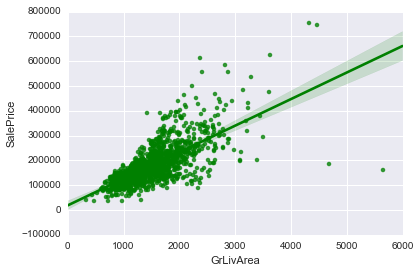

In [21]:
# Regplot: GrLivArea vs SalePrice
# GrLivArea: Above grade (ground) living area square feet
sns.regplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], color='green')

<i> Yeah! It's a positive linear relationship between SalePrice and GrLivArea

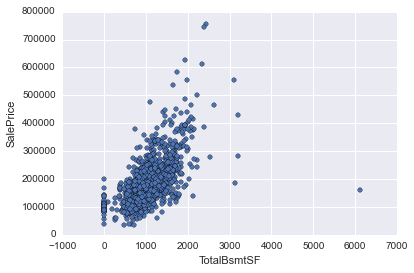

In [28]:
# Scatter plot: TotalBsmtSF vs SalePrice
# TotalBsmtSF: Total square feet of basement area
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

<i> Yeah! It's a positive linear relationship between SalePrice and TotalBsmtSF

#### <font color = blue> Scatter plots to display relationships between target variable and categorical variables

(-0.5, 9.5, 0, 800000)

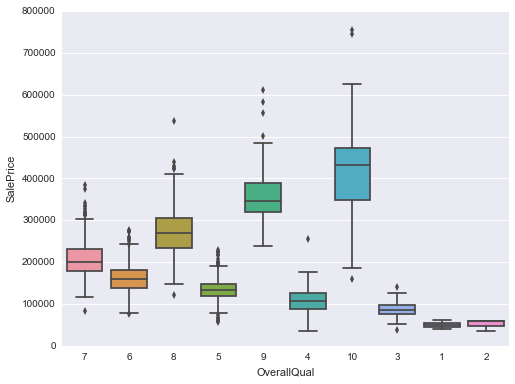

In [44]:
# Box plot: OverallQual vs SalePrice
# OverallQual: Rates the overall material and finish of the house
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)


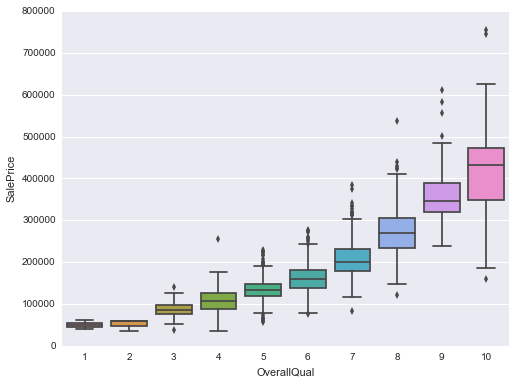

In [51]:
# Sorted the x axis in according order
# Box plot: OverallQual vs SalePrice
# OverallQual: Rates the overall material and finish of the house
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=sorted(df_train['OverallQual'].unique()))
fig.axis(ymin=0, ymax=800000);

<i> Yay! A very strong relationship between OverallQual and SalesPrice, as expected

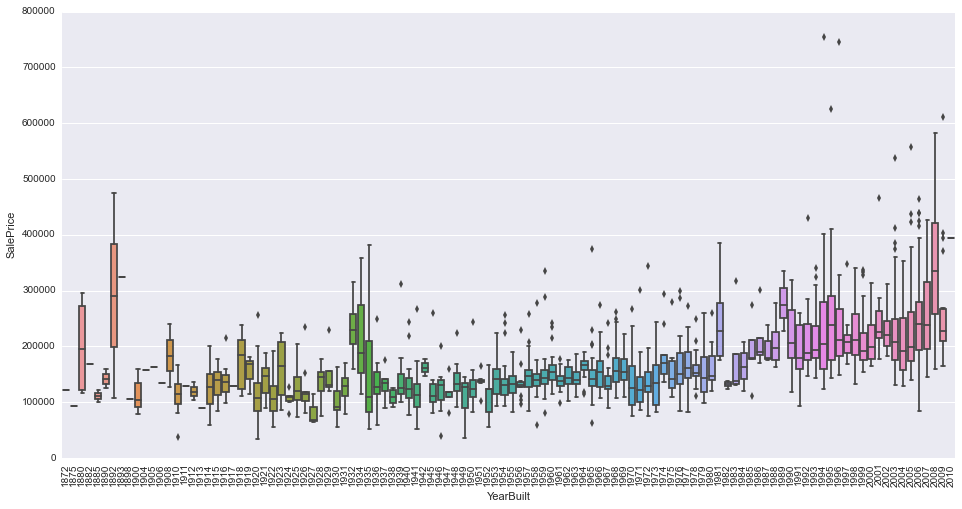

In [52]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=sorted(df_train['YearBuilt'].unique()))
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<i> Houses before 1900 seem to get high price. After then, though it's not too strong tendency, SalePrice of new houses are generally higher than that of old ones.

### Just a look back
We have just intuitively picked some variables and made plots to show the relationship. However, a practical approach is to see an overal correlation among variables through:
- A Correlation Matrix
- SalePrice Correlatin Matrix
- Scatter Plots of the most correlated variables

####Correlation Matrix - Heatmap style

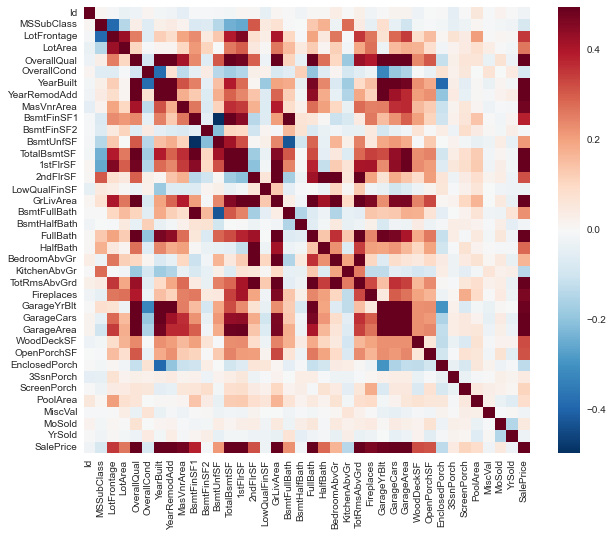

In [59]:
correlation_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=0.2, square=True)

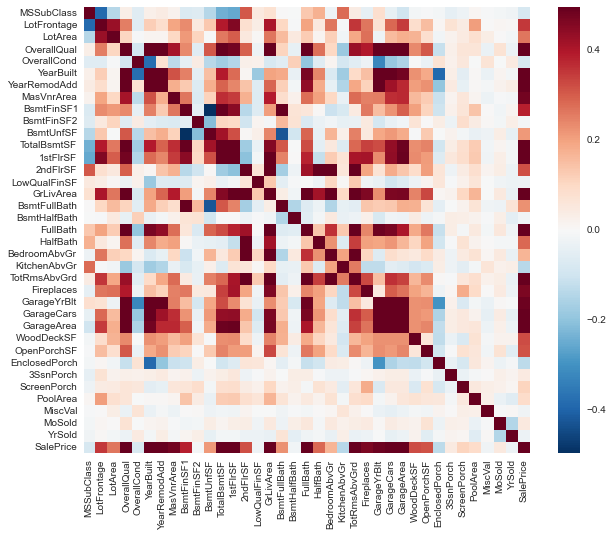

In [72]:
# Remove id before plotting
# Drop column Id
df_train_no_id = df_train.drop(['Id'], axis=1)
correlation_matrix = df_train_no_id.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=0.4, square=False)

<i> Look at the last column, it's easy to spot where the strong relatioships lie on. <br>
<i> Also, multicolinearily can be plotted.

#### Zoom into the top most correlated variables with SalePrice

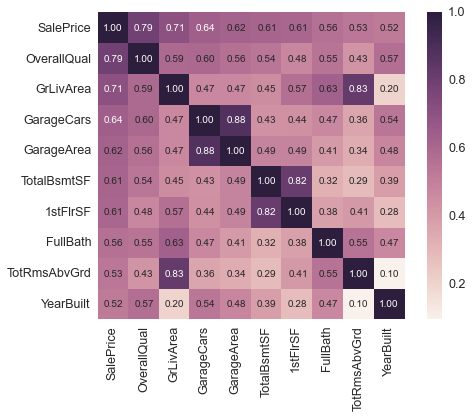

In [84]:
# Top 10 variable
k = 10
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)


<i> Some interesting interpretations: All intuitively make sense<br>
 - GarageCars and GarageArea: strong positive correlation 
 - OverallQal and TotRmsAbvGrd: strong positive correlation
 - YearBuilt and TotRmsAbvGrd: very weak relationship
 - YearBuilt and GrLivArea: very weak relationship

### Multiple Pair plots between SalePrice and correlated variables 

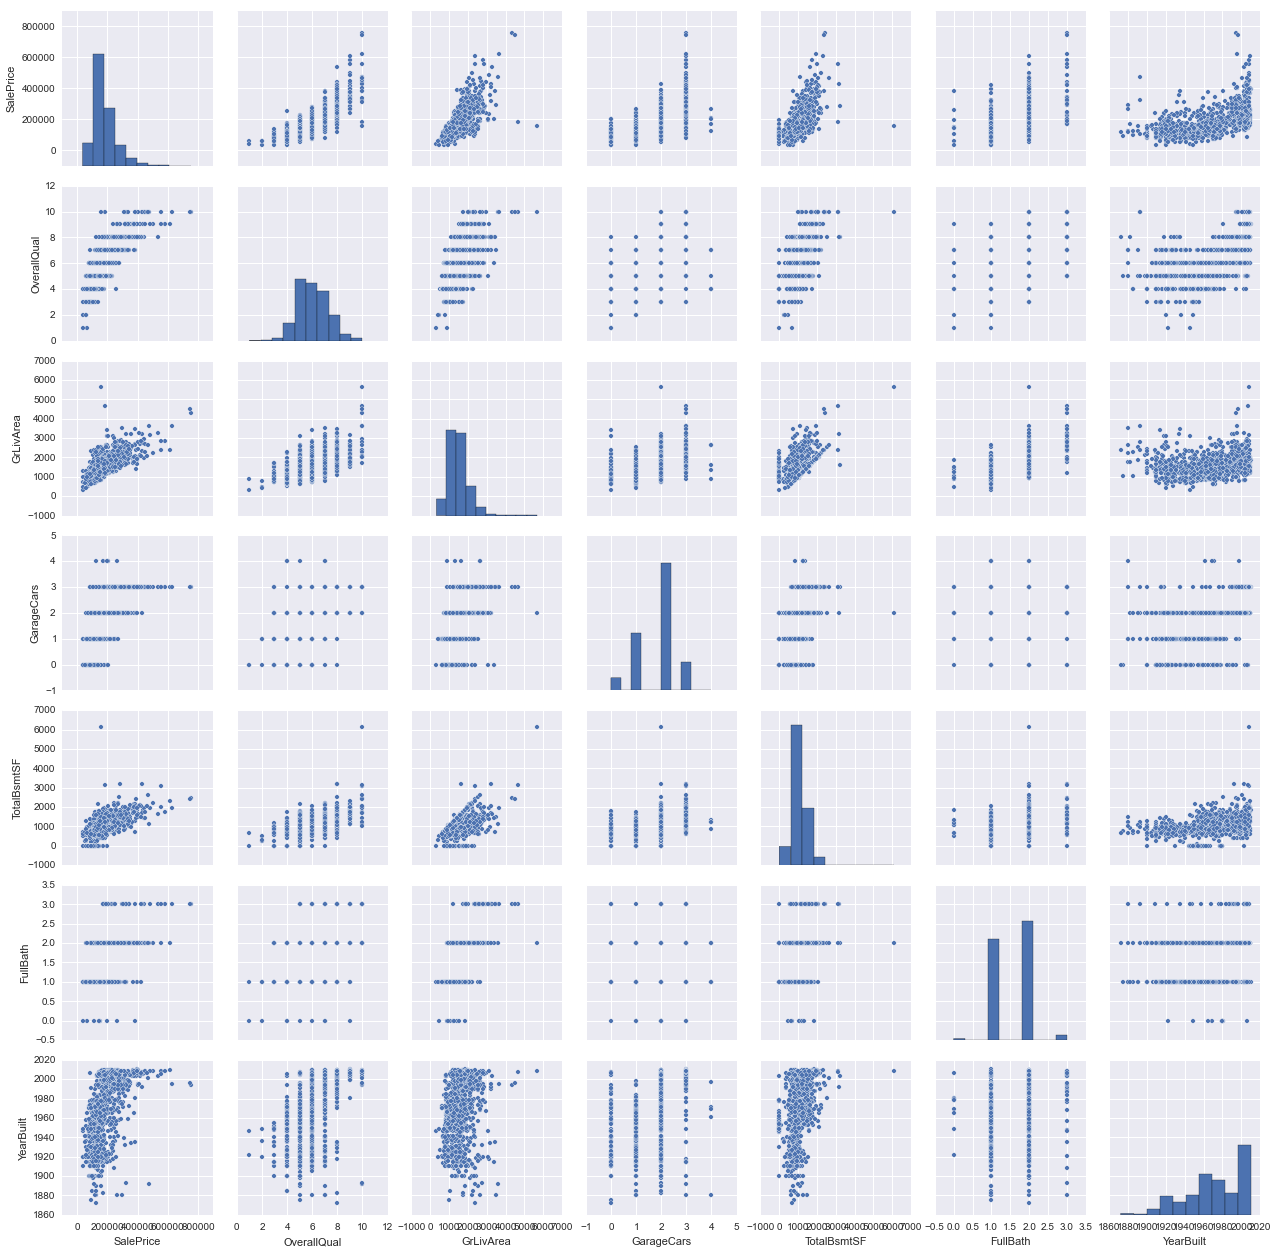

In [89]:
sns.set()
k = 7
#cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()
